In [1]:
import numpy as np
import pandas as pd
import fs_qe as fq

# 1 data process

The imported sample is constructed with the strategy that picking up the US firm with firm-size (total asset) data all available from 2020 to 2011. For details, please see the file ``11``.

In [2]:
df, df2, df3, df4 = fq.dataprocess(file='data_all/us_tasset_all_postprocess.csv', var1='logtasset', var2='tasset', var3='tasset_mean')

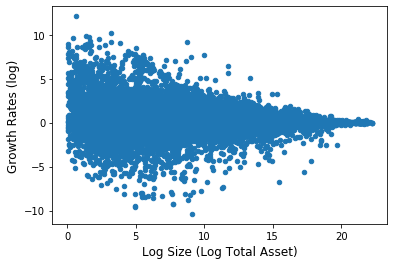

In [3]:
fq.scatterplot(df, x='logtasset', xlabel='Log Size (Log Total Asset)')

In [4]:
df5 = df2[df2['quantile_ex_1'] == pd.Interval(0.00895, 9.827, closed='right') ]
df6 = df2[df2['quantile_ex_1'] == pd.Interval(9.827, 11.388, closed='right') ]
df7 = df2[df2['quantile_ex_1'] == pd.Interval(11.388, 13.022, closed='right') ]
df8 = df2[df2['quantile_ex_1'] == pd.Interval(13.022, 22.227, closed='right') ]

In [5]:
draw1 = np.array(round(df5['fgrow_log'], ndigits=2))
draw2 = np.array(round(df6['fgrow_log'], ndigits=2))
draw3 = np.array(round(df7['fgrow_log'], ndigits=2))
draw4 = np.array(round(df8['fgrow_log'], ndigits=2))
draw1

array([-0.63,  0.08, -0.79, ...,  0.03,  0.07,  0.03])

# 2 bar graphs and PDFs

## 2.1 bar graphs for mean and standard deviation of firm growth 

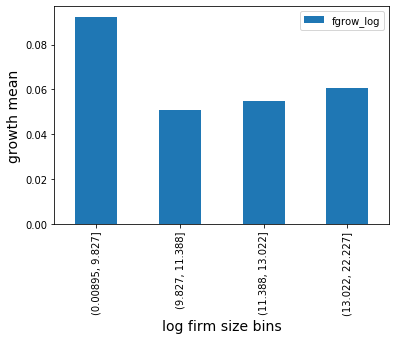

In [6]:
fq.plotbars(df3)

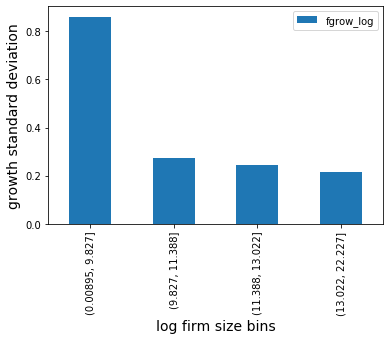

In [7]:
fq.plotbars(df4, ylabel='growth standard deviation')

## 2.2 PDFs for growth of firms in 4 bins above, respectively

The ``empirical func1`` shows the empirical PDF functions of firm growth for firms in **bin 1** above.

The ``empirical func2`` shows the empirical PDF functions of firm growth for firms in **bin 2** above.

The ``empirical func3`` shows the empirical PDF functions of firm growth for firms in **bin 3** above.

The ``empirical func4`` shows the empirical PDF functions of firm growth for firms in **bin 4** above.

In [8]:
d1 = fq.generating_pdf(draw1)
d2 = fq.generating_pdf(draw2)
d3 = fq.generating_pdf(draw3)
d4 = fq.generating_pdf(draw4)

In [9]:
x1 = d1['fgrow_mean']
x2 = d2['fgrow_mean']
x3 = d3['fgrow_mean']
x4 = d4['fgrow_mean']

y1 = d1['prob']
y2 = d2['prob']
y3 = d3['prob']
y4 = d4['prob']

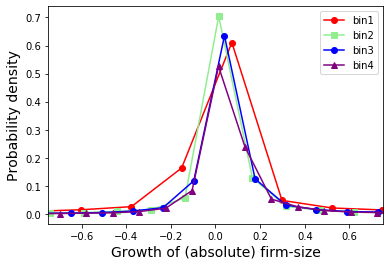

In [10]:
fq.density_plot(x1, x2, x3, x4, y1, y2, y3, y4)

# 3 tail index

In [11]:
s_dist1 = df.tasset
s_dist2 = df.logtasset
s_dist3 = df.fgrow_log

The tail index for firm size distribution with firm size measured by total asset is

In [12]:
fq.gabaix_est(s_dist1, c=0.01)

1.1826211650394658

The tail index for log firm size distribution with firm size measured by total asset is

In [13]:
fq.gabaix_est(s_dist2, c=0.01)

23.10084151290439

The tail index for firm growth distribution with firm size measured by total asset is

In [14]:
fq.gabaix_est(s_dist3, c=0.01)

2.2368798474051137

## 3.3 tail index for firm size distribution yearly from 2011 to 2020

In [15]:
n = 2010
N = 2018
while n <= N:
    x = df[df['year'] == n].tasset
    if len(x) == 0: 
        print('None in year', n)
    else:
        print('Tail index in year', n, 'is', fq.gabaix_est(x, c=0.01))
    n += 1

None in year 2010
Tail index in year 2011 is 1.1265104544174684
Tail index in year 2012 is 1.1347684345444469
Tail index in year 2013 is 1.1477595310930568
Tail index in year 2014 is 1.1260818183802144
Tail index in year 2015 is 1.1785958548579403
Tail index in year 2016 is 1.2101144073586116
Tail index in year 2017 is 1.2195222734001956
Tail index in year 2018 is 1.2621821610202808


## 3.4 tail index for log firm size distribution yearly from 2011 to 2020

In [16]:
n = 2010
N = 2018
while n <= N:
    x = df[df['year'] == n].logtasset
    if len(x) == 0: 
        print('None in year', n)
    else:
        print('Tail index in year', n, 'is', fq.gabaix_est(x, c=0.01))
    n += 1

None in year 2010
Tail index in year 2011 is 21.810211357399993
Tail index in year 2012 is 22.048380593827492
Tail index in year 2013 is 22.372559801862046
Tail index in year 2014 is 21.986404789422046
Tail index in year 2015 is 23.049870390771552
Tail index in year 2016 is 23.76844731552206
Tail index in year 2017 is 24.017024192741832
Tail index in year 2018 is 24.729148630246062


## 3.5 tail index for firm growth distribution yearly from 2011 to 2020

In [17]:
n = 2010
N = 2018
while n <= N:
    x = df[df['year'] == n].fgrow_log
    if len(x) == 0: 
        print('None in year', n)
    else:
        print('Tail index in year', n, 'is', fq.gabaix_est(x, c=0.01))
    n += 1

None in year 2010
Tail index in year 2011 is 2.1718487497886185
Tail index in year 2012 is 2.3922924622860213
Tail index in year 2013 is 2.416981107414367
Tail index in year 2014 is 2.224302608332632
Tail index in year 2015 is 2.254032230926471
Tail index in year 2016 is 2.459453959098238
Tail index in year 2017 is 2.0022071666242423
Tail index in year 2018 is 2.0378867865251715
